<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp25/blob/main/Exercises/PythonRefreshers_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Refresher 3
In this notebook, we cover:
*   Applying functions to all elements in a NumPy array
*   Masking
*   Pandas



First, import numpy

In [1]:
import numpy as np

## Applying functions to all elements in a NumPy array
[Different methods with speed comparisons](https://stackoverflow.com/a/46470401)

Numpy's vectorize function lets you take operations you wrote as functions and <br>
apply them to your data set.

In [2]:
def square_f(x):
  return x*x
square_v = np.vectorize(square_f)

In [3]:
size = 1000000

# declaring array
array = np.arange(size)
len(array)

1000000

In [4]:
%%timeit
_ = square_v(array)

355 ms ± 43.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


However, list notation is sometimes even faster for simple functions.

In [5]:
%%timeit
_ = np.array([x*x for x in array])

380 ms ± 42.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And **for the simplest functions** with numpy arrays such as **multiplication,** <br>
**division, and other simple math operators, you should just do those directly**. <br>
Notice how **multiplying an array by itself is the same as multiplying each item** <br>
**by itself but this is literally 100 times faster!** That's because libraries like <br>
numpy are built on languages like C and C++ which are much faster than python.

In [6]:
%%timeit
_ = array*array

4.76 ms ± 834 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Masking

First let's get some "real" data. sklearn or **sci-kit learn is a great library** <br>
**for simple statistics and machine learning tools**. In this library, they also <br>
provide the **fetch_openml tool** which **allows you to download data** from the <br>
website openml.org.

Let's download the MNIST dataset, which contains 70,000 28x28 pixel images of <br>
handwritten numerical digits.

In [7]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')

import tensorflow as tf
from sklearn.utils import Bunch
import pandas as pd

def mnist_tf_keras():
    # Load the MNIST dataset using TensorFlow
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Combine training and testing data
    x_data = tf.concat([x_train, x_test], axis = 0)
    y_data = tf.concat([y_train, y_test], axis = 0)
    
    # Flatten the images into vectors
    x_data_flat = x_data.numpy().reshape(len(x_data), -1)
    
    # Create a DataFrame for the feature data
    feature_names = [f"pixel{i}" for i in range(x_data_flat.shape[1])]
    x_df = pd.DataFrame(x_data_flat, columns = feature_names)
    
    # Create a DataFrame for the target data
    y_df = pd.DataFrame(y_data.numpy(), columns = ["target"])
    
    # Combine features and target into a single DataFrame
    data_frame = pd.concat([x_df, y_df], axis = 0)
    
    # Prepare a description for metadata
    description = "This dataset contains 70,000 images of handwritten digits (0-9) from the MNIST dataset. Each image is 28x28 pixels, flattened into a 784-dimensional vector."
    
    # Create a Bunch object similar to the sklearn's fetch_openml output
    return Bunch (
        data = x_df,
        target = y_df,
        feature_names = feature_names,
        frame = data_frame,
        target_names = ["digit_class"],
        DESCR = description,
    )
    
    # return mnist
mnist = mnist_tf_keras()

We can use .keys() to get the names of content within an sklearn openml file.

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'frame', 'target_names', 'DESCR'])

In this case, our openml dataset is a sklearn.utils.Bunch file.

In [9]:
type(mnist)

sklearn.utils._bunch.Bunch

Data and target are common labels for your input data and the output you would <br>
want to get from a model respectively.

In [10]:
X, y = mnist["data"], mnist["target"]

mnist["data"] is a pandas DataFrame. We'll get to that more later.

In [11]:
type(X)

pandas.core.frame.DataFrame

Our pandas dataframe also has keys. Notice how here, all of the **keys are** <br>
**labeled as pixels 1-784**. So **each item** in that dataframe is probably a **784 pixel** <br>
**image**.

In [12]:
print(X.keys())

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


We can **use .values to extract numeric or other data type values** from our <br>
dataframe **as a numpy array**.

In [13]:
X_mat = X.values
# y_arr = y.values.astype(np.uint8)
y_arr = y.values[:, 0].astype(np.uint8)

In [14]:
type(X_mat)

numpy.ndarray

Our output/target data has a shape of 70,000 items and our input has a shape of <br>
70,000 items by 784 pixels.

In [15]:
y_arr.shape

(70000,)

In [16]:
X_mat.shape

(70000, 784)

In [17]:
X_mat = X_mat.reshape(X_mat.shape[0], 28, 28)

**matplotlib is** short for mathematical plotting library. It's **a collection of** <br>
**tools for visualising/plotting data**. **pyplot is a library within matplotlib** that <br>
has some tools **more specific to just creating plots**. The standard names we <br>
use to import these are mpl for matplotlib and plt for matplotlib.pyplot.

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Here we can use the pyplot plot type **imshow to view one of those 784 pixel** <br>
**images**.

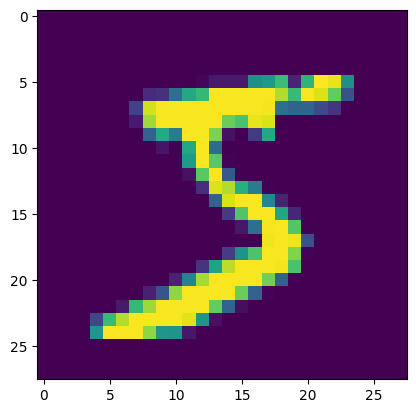

In [19]:
plt.imshow(X_mat[0])

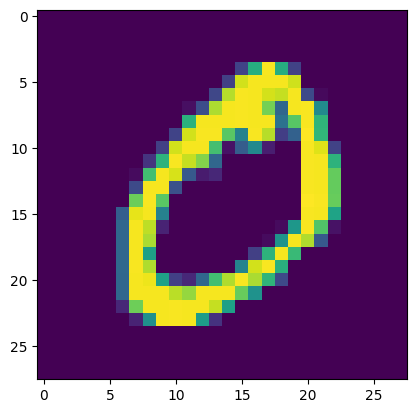

In [20]:
plt.imshow(X_mat[1])

The first two images were a 5 and 0. And sure enough, our first 2 items in our <br>
output data are 5 and 0. So the output data is labels of the number image.

In [21]:
y_arr[0:2]

array([5, 0], dtype=uint8)

When we perform **logical operations on numpy arrays**, we can **create masks**. For <br>
example, writing **y_arr == 3 says: create a new array which is only True at the** <br>
**location of each 3 and False everywhere else**.

In [22]:
# this is a mask
y_arr == 3

array([False, False, False, ..., False, False, False])

We can also **take that mask array** of True and False values **and pass it to** <br>
**another array like it's a collection of indices**. The result is that we'll <br>
get values from that other array only at the indices that were labeled as True.

In [23]:
only_3 = X_mat[y_arr == 3]

Because the new array only_3 is the collection of images only at the location <br>
where our label was 3, we should only have images of 3's left over.

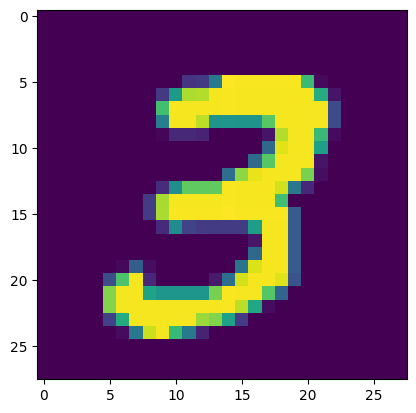

In [24]:
plt.imshow(only_3[0])

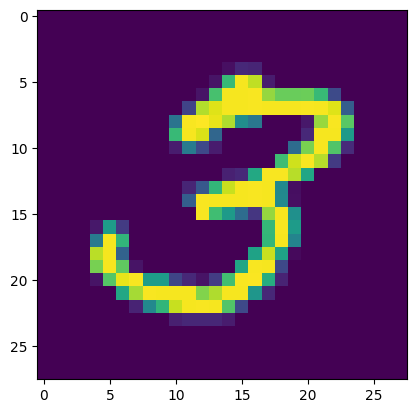

In [25]:
plt.imshow(only_3[42])

## Pandas

**What is pandas?**

Pandas is a library for data analysis, with a data storing system built <br>
off of Numpy. It can handle data from a wide variety of formats and provides powerful <br> tools for viewing and manipulating that data.

Some additional resources: <br>
[Introduction to pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) - Interactive tutorial created by Google

[Pandas documentation](https://pandas.pydata.org/docs/) - Lots of good info here for both beginner and advanced users.

We import pandas with the shortened name `pd` by running `import pandas as pd`

In [26]:
import pandas as pd

Let's first create a NumPy array to work with. <br>

We'll use the NumPy function `randint` to create an array of size (4,3) <br>
filled with random integers ranging from 0 to 100

In [27]:
np.random.seed(42) # Set random seed for reproducible results
mydata = np.random.randint(low=0, high=101, size=(4,3))
print(mydata)

[[51 92 14]
 [71 60 20]
 [82 86 74]
 [74 87 99]]


We can now directly convert this array into a **pandas DataFrame** <br>

DataFrames are the primary data storing objects used in pandas, and they <br>
can be built from arrays using `pd.DataFrame()`. Let's try passing <br>
our array in and store it in the variable `df`

In [28]:
df = pd.DataFrame(mydata)

Now let's see what `df` looks like

In [29]:
df

,0,1,2
0,51,92,14
1,71,60,20
2,82,86,74
3,74,87,99


Ok, nothing too new, but we see an important difference from <br>
NumPy arrays: **DataFrames include labeled indexes and columns** <br>

In this case, we just have the default labels of 0, 1, 2, etc, but the <br> power of pandas starts to show when we specify the labels on our data. <br>

Let's imagine that our data represents the scores of four students on <br>
three different midterm exams. We'll call the students Bob, Ann, Steve, and Laura <br> and store them in a list. We'll also create the midterms:

In [30]:
students = ["Bob", "Ann", "Steve", "Laura"]
midterms = ["Midterm 1", "Midterm 2", "Midterm 3"]

We can now use these as arguments to `pd.DataFrame()` as follows:

In [31]:
df = pd.DataFrame(data=mydata, index=students, columns=midterms)

What does `df` look like now?

In [32]:
df

,Midterm 1,Midterm 2,Midterm 3
Bob,51,92,14
Ann,71,60,20
Steve,82,86,74
Laura,74,87,99


We have an informative table showing our data!

Another important property that differentiates DataFrames from NumPy arrays <br>
is their ability to store data of different types. For example, a single NumPy <br> array cannot store both integers and strings, but a DataFrame can. <br>

Here's an example to show this: let's create a DataFrame which stores the <br>
name, height (in meters), age (in years), and birth month of five people

In [33]:
name = ["Bob", "Ann", "Steve", "Laura", "Jack"]
height = [1.78, 1.70, 1.60, 1.83, 1.72]
age = [32, 24, 20, 74, 66]
birth_month = ["September", "April", "June", "September", "March"]

There are multiple ways to put multiple lists into a DataFrame. For now, <br>
we'll use the format: `pd.DataFrame({"label": data})`, separating our <br>
different categories with commas.

In [34]:
people_df = pd.DataFrame({"Name": name,
                         "Height (m)": height,
                         "Age (years)": age,
                         "Birth Month": birth_month})

In [35]:
people_df

,Name,Height (m),Age (years),Birth Month
0,Bob,1.78,32,September
1,Ann,1.70,24,April
2,Steve,1.60,20,June
3,Laura,1.83,74,September
4,Jack,1.72,66,March


### Large Data Example

Let's now look at how a large machine learning dataset is stored in a <br>
pandas DataFrame and what methods we can use to view and understand the data.
<br>

We'll load in the MNIST dataset as before, storing the data samples in `X` <br> and the labels in `y`

In [36]:
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

Now, what type of object is `X`?

In [37]:
type(X)

pandas.core.frame.DataFrame

A pandas DataFrame!

We can check the shape of `X` using the DataFrame property `.shape`

In [38]:
X.shape

(70000, 784)

We interpret this as: `X` has 70,000 samples, each with 784 data points. <br>
This is the MNIST dataset, so we have 70,000 different grayscale pictures, <br> each with 784 pixels of intensities ranging from 0 to 255.

With so many samples, we can't view them all at once! A common way to take a <br>
quick look at the data is to use the `.head(n)` method, which shows the <br>
first *n* samples of the DataFrame.

In [39]:
X.head() # shows first 5 rows by default

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X.head(8) # show first 8 rows

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can look at some of the statistical information of each feature, such as <br>
mean and standard deviation, using `.describe()`

In [41]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


We can index through DataFrames similarly to NumPy arrays using `.iloc`. <br>

For example, `X.iloc[0]` returns the data points of the first sample.

In [42]:
X.iloc[0]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: uint8

To get the actual numerical values in a NumPy array, we use `.values` <br>

For example, `X.values[0]` returns a NumPy array containing the pixel <br>
intensity values of the first sample, which we'll store in `tmp`

In [43]:
tmp = X.values[0]
print(type(tmp))
print(tmp[210:230]) # Look at pixels 210 through 229

<class 'numpy.ndarray'>
[253 253 253 251  93  82  82  56  39   0   0   0   0   0   0   0   0   0
   0   0]


We can view the columns of a DataFrame using `.columns`

In [44]:
X.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

You can access the contents of a column simply using the column's name. <br>

For example, we can look at the intensities of pixel1 across different samples <br> by running `X['pixel1']` or `X.pixel1`

In [45]:
X['pixel1']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    0
69997    0
69998    0
69999    0
Name: pixel1, Length: 70000, dtype: uint8

In [46]:
X.pixel1

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    0
69997    0
69998    0
69999    0
Name: pixel1, Length: 70000, dtype: uint8

## Activity

For this activity we will continue to use the mnist datasets we've been working <br>
with. This actvitivy will involve 6 steps: <br>
1. Access the data and target values from the mnist data set and save it to new <br> variables called `data` and `target`. **Do not reuse the names X, and y for those** <br> **variables**. <br>
2. Use the `iloc` function to get the item at index 500 from from `data` and <br> `target` and save them to new variables called `data_500` and `target_500` <br>
3. Use `.values` to convert `data_500` to a numpy array called `d_500_vals`. <br>
4. Use `int(target_500)` to convert `target_500` from a string to an integer <br> called `t_500_vals`. <br>
5. Use `.reshape()` to reshape `d_500_vals` to have shape (28, 28). <br>
6. Finally, use `plt.imshow()` and `print()` to display `d_500_vals` and `t_500_vals` <br>
in one cell.

In [47]:
#Generate the data here:
########################
data, target = mnist["data"], mnist["target"]

data_500 = data.iloc[500]
target_500 = target.iloc[500]

d_500_vals = data_500.values
t_500_vals = int(target_500)
########################

C:\Users\prasa\AppData\Local\Temp\ipykernel_12340\3393891184.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  t_500_vals = int(target_500)


3


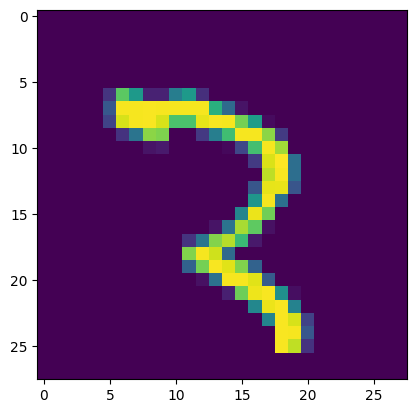

In [48]:
#Display d_500_vals:
########################
print(t_500_vals)

plt.imshow(d_500_vals.reshape(28, 28))
plt.show()
########################

In [49]:
#EXAMPLE OUTPUT